In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

RUNNING_DIR = r"c:\\Users\\micha\\Downloads\\Bens_Tetris_Regression"

In [2]:
def load_data (path):
    df = pd.read_csv (path)
    df.columns = df.columns.str.lower()
    df.dropna(inplace=True)
    
    return df

def non_linear_regression (func, xData, yData):
    popt, pcov = curve_fit(
        func, 
        xData, 
        yData,
        bounds=(-1000, [1000.,  1000.,  1000. ]),
        check_finite=True,
        maxfev=10000,
    )
    
    
    return popt

def plot_regression (func, xData, yData, popt):
    sns.set_theme()
    plt.scatter (xData, yData, s=3, label='data', edgecolors="#146fa3", linewidths=1, alpha=0.5)

    xModel = np.linspace (min(xData), max(xData), 250)
    yModel = func (xModel, *popt)
    plt.plot(
        xModel, yModel, 'r-',
        label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

    plt.legend()
    plt.show()
    
def calculate_metrics (func, xData, yData, popt):
    AE = (func(xData, *popt)) - yData
    SE = np.square(AE) 
    MSE = np.mean(SE) 
    RMSE = np.sqrt(MSE) 
    Rsquared = 1.0 - (np.var(AE) / np.var(yData))
    print(f"{RMSE=}")
    print(f"{Rsquared=}")
    

In [4]:
def main (data_path, func, xData, yData):
    df = load_data (os.path.join(RUNNING_DIR, data_path))
    params = non_linear_regression (
        func, xData, yData
    )
    
    plot_regression(
        func, xData, yData, params
    )
    
    calculate_metrics(
        func, xData, yData, params
    )
    

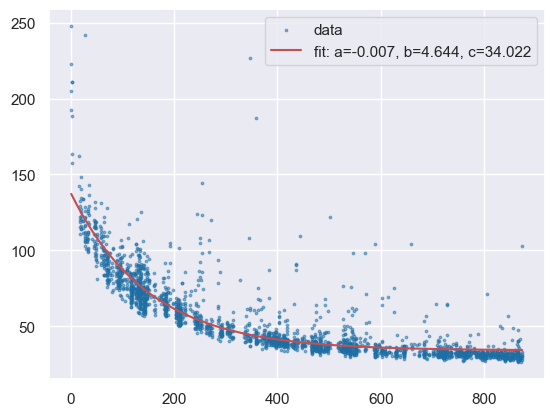

RMSE=11.813217696660045
Rsquared=0.7989868903501287


In [5]:
main (
    "sprint_data.csv", 
    lambda x, a, b, c: np.e**(a*x+b)+c, 
    df["dayssincestart"], 
    df["timescorekaiyon"]
)